# Обучение с применением учителя (supervised learning)
### Основные определения

$X$ &ndash; множество объектов <br/>
$Y$ &ndash; множество ответов <br/>
$y^*: X \rightarrow Y$ &ndash; целевая функция <br/>

Пусть для набора объектов $X$ задан набор отображений $f_1, \dots, f_n: X \rightarrow D_{f_i}$ . Будем называть их признаками, значения $f_i$ - результат измерения некоторой характеристики объекта $x  \in X$ .
* если $D_{f_i}$ - конечное множество, то $f_i$ - *номинальный* признак
* если $D_{f_i} = \{0, 1\}$ , то $f_i$ - *бинарный* признак 
* если $D_{f_i} = \mathbb R$ , то $f_i$ - *количественный* признак

Таким образом, кажому объекту $x \in X$ можно сопоставить $(f_1, \dots, f_n)$ который называется признаковым описанием объекта $x$.

### Постановка задачи

Значения целевой функции известны на конечном множестве объектов: <br/> $\{x_1, \dots, x_l\} \subset X$

$T^l = \{(x_i, y_i)\}^l_{i=1}$ &ndash; обучающая выборка

По выборке $T^l$ нужно восстановить зависимость $y^*$, то есть построить функцию <br/> $a: X \rightarrow Y$,<br/>
которая достаточно хорошо приближала бы функцию $y^*$ на всём множестве $X$.

### Типы задач

##### В зависимости от множества $Y$ задачу можно разделить на следующие типы:
Задача классификации
>$Y=\{1,\dots,M\}$

Восстановления регрессии
> $Y=\mathbb R$ 

##### В зависимости от известных данных и области применения:

Transductive learning 
> если все объекты $X$ известны во время обучения.

Semi-supervised learning 
> если во время обучения помимо $T^l$ дано ещё большое количество объекто $S^u = \{x_{l+1}, \dots, x_{l+u}\} \subset X$ для которых неизвестно значение функции $y^*$. Обычно $l \ll u$.

### Функционал качества

Пусть $a$ функция ("алгоритм"), которую мы нашли в процессе решения задачи. Пусть функция задана функция $\mathbb L(a,x_i)$, характеризующая величину ошибки функции $a$ на объекте $x_i$: $a(x_i)$. Если ответ алгоритма в точке $x_i$ корректен, тогда $\mathbb L(a,x_i)=0$

Определим *функционал качества* на тренировочном множестве $X$ как среднее значение функции потерь на элементах этого множества:<br/> 
$Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}\mathbb L(a,x_i)$

Примеры функций потерь:
* $Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}[a(x) \neq y^*(x)]$ &mdash; индикатор ошибки
* $Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}|a(x) - y^*(x)|$ &mdash; средняя ошибка
* $Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}(a(x) - y^*(x))^2$ &mdash; серднеквадратичная ошибка

### Модель алгоритмов обучения

Если мы ищем алгоритм $a(x)$ из некоторого параметрического семейства $A = \{a(x, \theta) | \theta \in \Theta\}$, $a(x) \in A$, то $A$ называется моделью алгоритмов, а $\Theta$ называется пространством параметров. 

Соотве нам нужно минимизировать функционал качества по $\theta$: <br/>

$$a(x) = \arg \min_{\theta \in \Theta}  Q(a(x, \theta), X^l)$$

# Примеры

In [1]:
import sklearn.datasets as ds
import pandas as pd
import numpy as np

 Пример задачи восстановления регрессии - по характеристика квартиры нужно предположить рыночную цену.

In [2]:
#df = pd.read_csv('data/real_estate.csv')
df = pd.read_csv('http://pastebin.com/raw.php?i=RcHeuYJ4')
df.head(5)

,Unnamed: 0,Комнат,Район города,Адрес,Этаж,Общ,Жил,Кух,М,Тел,Примечания,#Цена
0,1,1,Московский,Пулковское ш.,0/0,35.7,0.0,0.0,NaN,NaN,NaN,3820.0
1,2,1,Московский,Пулковское ш.,0/0,27.5,0.0,0.0,NaN,NaN,NaN,3080.0
2,3,1,Московский,Московское ш.,0/0,35.5,0.0,0.0,NaN,NaN,NaN,3470.0
3,4,1,Московский,Московское ш.,0/0,33.5,0.0,0.0,NaN,NaN,NaN,2989.0
4,5,1,Московский,Московское ш.,0/0,24.2,0.0,0.0,NaN,NaN,NaN,2261.0


Пример набора данных для задачи semi-supervised learning ("с чатсичным привлечением учителя"). Дано большое количество непомеченных данных и много меньше почеченных. Информация о непомеченных данных помогает восстановить некоторые характеристики.

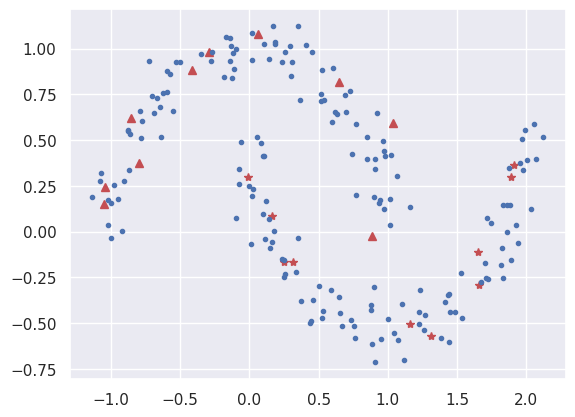

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

xy, c = ds.make_moons(200, shuffle=False, noise=0.09)

ind0 = np.arange(0, 100)
ind1 = np.arange(100, 200)
np.random.shuffle(ind0)
np.random.shuffle(ind1)

plt.plot(xy[ind0[:10], 0], xy[ind0[:10], 1], 'r^')

plt.plot(xy[ind1[:10], 0], xy[ind1[:10], 1], 'r*')

plt.plot(xy[ind0[10:], 0], xy[ind0[10:], 1], 'b.')
plt.plot(xy[ind1[10:], 0], xy[ind1[10:], 1], 'b.')

Классический набор данных для задачи классификации - по характеристиками цветка
- длина наружной доли околоцветника (sepal length)
- ширина наружной доли околоцветника (sepal width)
- длина внутренней доли околоцветника (petal length)
- ширина внутренней доли околоцветника (petal width)

нужно восстановить к какому виду Ириса пренадлежит конктретный экземпляр - 

- Ирис щетинистый (Iris setosa)
- Ирис виргинский (Iris virginica)
- Ирис разноцветный (Iris versicolor). 



In [6]:
data = ds.load_iris()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['Class'] = data['target']
df.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
